In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
import matplotlib_venn
import networkx
import numexpr
import numpy as np
import numpy.linalg
import numpy.random
import pandas
import pickle
import pylab
import requests
import sakmapper
import scipy
import scipy.cluster.hierarchy as sch
import scipy.interpolate
import scipy.optimize
import scipy.signal
import scipy.spatial.distance
import scipy.stats
from scipy.spatial.distance import pdist, squareform, euclidean
from scipy.sparse import csr_matrix, csc_matrix, coo_matrix, lil_matrix
from sklearn import cluster
import sklearn.cluster
import sklearn.metrics.pairwise
from math import sqrt

In [2]:
pd.read_csv("data/scTDA Tutorial/Embryo.all.tsv", sep="\t")

ID  timepoint          lib      A1BG  A1BG-AS1  A1CF  \
0              D7_E7_19_1          7        E7_19  5.822463  0.000000   0.0   
1              D7_E7_19_2          7        E7_19  0.000000  0.000000   0.0   
2              D7_E7_19_3          7        E7_19  0.000000  0.000000   0.0   
3              D7_E7_19_4          7        E7_19  0.000000  0.000000   0.0   
4              D7_E7_19_6          7        E7_19  0.000000  0.000000   0.0   
5              D7_E7_19_7          7        E7_19  0.000000  0.000000   0.0   
6              D7_E7_19_8          7        E7_19  0.000000  0.000000   0.0   
7              D7_E7_19_9          7        E7_19  0.000000  0.000000   0.0   
8             D7_E7_19_10          7        E7_19  5.822463  0.000000   0.0   
9             D7_E7_19_11          7        E7_19  0.000000  0.000000   0.0   
10            D7_E7_19_12          7        E7_19  0.000000  0.000000   0.0   
11            D7_E7_19_13          7        E7_19  0.000000  0.000000   0.0   
12            D7_E7_19_14          7        E7_19  0.000000  0.000000   0.0   
13            D7_E7_19_15          7        E7_19  0.000000  0.000000   0.0   
14            D7_E7_19_16          7        E7_19  0.000000  0.000000   0.0   
15            D7_E7_19_17          7        E7_19  0.000000  0.000000   0.0   
16            D7_E7_19_18          7        E7_19  0.000000  0.000000   0.0   
17            D7_E7_19_19          7        E7_19  0.000000  0.000000   0.0   
18            D7_E7_19_20          7        E7_19  0.000000  0.000000   0.0   
19            D7_E7_19_21          7        E7_19  0.000000  0.000000   0.0   
20            D7_E7_11_22          7        E7_11  0.000000  0.000000   0.0   
21            D7_E7_11_23          7        E7_11  0.000000  0.000000   0.0   
22            D7_E7_11_24          7        E7_11  0.000000  0.000000   0.0   
23            D7_E7_11_25          7        E7_11  0.000000  0.000000   0.0   
24            D7_E7_11_26          7        E7_11  0.000000  0.000000   0.0   
25            D7_E7_11_27          7        E7_11  0.000000  0.000000   0.0   
26            D7_E7_11_28          7        E7_11  0.000000  0.000000   0.0   
27            D7_E7_11_29          7        E7_11  0.000000  0.000000   0.0   
28            D7_E7_11_30          7        E7_11  0.000000  0.000000   0.0   
29            D7_E7_11_31          7        E7_11  0.000000  0.000000   0.0   
...                   ...        ...          ...       ...       ...   ...   
1385        D5_E5_14_1499          5        E5_14  0.000000  0.000000   0.0   
1386        D5_E5_14_1500          5        E5_14  0.000000  0.000000   0.0   
1387        D5_E5_14_1501          5        E5_14  0.000000  0.000000   0.0   
1388        D5_E5_14_1502          5        E5_14  0.000000  0.000000   0.0   
1389        D5_E5_14_1503          5        E5_14  0.000000  0.000000   0.0   
1390        D5_E5_14_1504          5        E5_14  0.000000  0.000000   0.0   
1391  D5_E5_early_36_1505          5  E5_early_36  6.809660  0.000000   0.0   
1392  D5_E5_early_36_1506          5  E5_early_36  0.000000  0.000000   0.0   
1393  D5_E5_early_36_1507          5  E5_early_36  0.000000  0.000000   0.0   
1394  D5_E5_early_36_1508          5  E5_early_36  0.000000  0.000000   0.0   
1395  D5_E5_early_36_1509          5  E5_early_36  0.000000  0.000000   0.0   
1396  D5_E5_early_36_1510          5  E5_early_36  0.000000  0.000000   0.0   
1397  D5_E5_early_36_1511          5  E5_early_36  0.000000  0.000000   0.0   
1398  D5_E5_early_36_1512          5  E5_early_36  0.000000  0.000000   0.0   
1399  D5_E5_early_36_1513          5  E5_early_36  0.000000  0.000000   0.0   
1400  D5_E5_early_36_1514          5  E5_early_36  5.822463  0.000000   0.0   
1401  D5_E5_early_36_1515          5  E5_early_36  0.000000  0.000000   0.0   
1402  D5_E5_early_36_1516          5  E5_early_36  0.000000  0.000000   0.0   
1403  D5_E5_early_36_1517          5  E5_early_36  0.000000  0.000000   0

In [3]:
pd.read_csv("data/scTDA Tutorial/Embryo.mapper.tsv", sep="\t")

7.39032874721  8.12385050789  10.7517744492       0.0  8.60779888615  \
0          9.499176       5.822463       0.000000  5.822463       0.000000   
1          8.123851       0.000000       0.000000  0.000000       5.822463   
2          8.386023       7.390329       0.000000  8.123851       5.822463   
3          8.123851       7.390329       0.000000  8.123851       0.000000   
4          8.969547       7.390329       0.000000  6.809660       5.822463   
5          8.607799       8.123851       0.000000  6.809660       6.809660   
6          8.799982       8.607799       0.000000  5.822463       0.000000   
7          9.258530       8.123851       0.000000  0.000000       6.809660   
8          8.386023       7.803215       0.000000  7.803215       8.386023   
9          8.969547       9.121262       0.000000  6.809660       5.822463   
10         6.809660       7.803215       0.000000  9.499176       5.822463   
11         9.705361       0.000000       0.000000  0.000000       7.390329   
12         7.390329       5.822463       0.000000  0.000000       6.809660   
13         8.386023       7.390329       0.000000  0.000000       0.000000   
14         8.123851       8.386023       0.000000  6.809660       5.822463   
15         7.803215       6.809660       0.000000  0.000000       6.809660   
16         8.123851       0.000000       0.000000  0.000000       5.822463   
17         7.803215       9.499176       0.000000  0.000000       9.121262   
18         7.390329       8.123851       0.000000  0.000000       5.822463   
19         8.969547       8.123851       0.000000  7.390329       6.809660   
20         7.803215       7.390329       0.000000  7.390329       5.822463   
21         7.390329       7.803215       0.000000  6.809660       6.809660   
22         7.390329       7.390329       0.000000  6.809660       6.809660   
23         0.000000       6.809660       0.000000  8.123851       6.809660   
24         8.799982       7.803215       0.000000  7.803215       6.809660   
25         0.000000       6.809660       0.000000  5.822463       8.386023   
26         7.390329       6.809660       0.000000  8.123851       5.822463   
27         5.822463       7.390329       0.000000  7.803215       6.809660   
28         8.799982       6.809660       0.000000  5.822463       8.607799   
29         6.809660       5.822463       0.000000  8.386023       7.390329   
...             ...            ...            ...       ...            ...   
1384       0.000000       7.803215       0.000000  5.822463       5.822463   
1385       5.822463       8.607799       0.000000  7.803215       6.809660   
1386       8.799982      10.441635       0.000000  7.390329       8.969547   
1387       8.969547       9.605949       0.000000  9.121262       5.822463   
1388       0.000000       9.121262       0.000000  6.809660       6.809660   
1389       0.000000       9.798362       0.000000  6.809660       5.822463   
1390       0.000000       0.000000       0.000000  8.123851       7.390329   
1391       0.000000       0.000000       6.809660  7.390329       0.000000   
1392       0.000000       0.000000       0.000000  5.822463       0.000000   
1393       0.000000       0.000000       0.000000  0.000000       7.803215   
1394       0.000000       5.822463       0.000000  5.822463       0.000000   
1395       0.000000       0.000000       0.000000  5.822463       6.809660   
1396       0.000000       0.000000       0.000000  5.822463       6.809660   
1397       0.000000       0.000000       0.000000  7.390329       6.809660   
1398       0.000000       0.000000       0.000000  5.822463       7.803215   
1399       0.000000       0.000000       0.000000  8.607799       7.803215   
1400       0.000000       0.000000       0.000000  0.000000       9.258530   
1401       0.000000       5.822463       0.000000  7.390329       5.822463   
1402       0.000000       0.000000       0.000000  0.000000       6.809660   
1403       0.000000       0.

In [4]:
pd.read_csv("data/scTDA Tutorial/Embryo.no_subsampling.tsv", sep="\t")

ID  timepoint          lib       A1BG  A1BG-AS1  \
0              D7_E7_19_1          7        E7_19  10.257352  0.000000   
1              D7_E7_19_2          7        E7_19   0.000000  0.000000   
2              D7_E7_19_3          7        E7_19   0.000000  0.000000   
3              D7_E7_19_4          7        E7_19   0.000000  0.000000   
4              D7_E7_19_6          7        E7_19   9.499176  0.000000   
5              D7_E7_19_7          7        E7_19  10.605023  0.000000   
6              D7_E7_19_8          7        E7_19   8.969547  0.000000   
7              D7_E7_19_9          7        E7_19  11.411981  8.386023   
8             D7_E7_19_10          7        E7_19  10.257352  0.000000   
9             D7_E7_19_11          7        E7_19   0.000000  0.000000   
10            D7_E7_19_12          7        E7_19  10.926766  0.000000   
11            D7_E7_19_13          7        E7_19   9.798362  6.809660   
12            D7_E7_19_14          7        E7_19   0.000000  0.000000   
13            D7_E7_19_15          7        E7_19   0.000000  0.000000   
14            D7_E7_19_16          7        E7_19   0.000000  0.000000   
15            D7_E7_19_17          7        E7_19   0.000000  0.000000   
16            D7_E7_19_18          7        E7_19   0.000000  0.000000   
17            D7_E7_19_19          7        E7_19   0.000000  0.000000   
18            D7_E7_19_20          7        E7_19   0.000000  0.000000   
19            D7_E7_19_21          7        E7_19   0.000000  0.000000   
20            D7_E7_11_22          7        E7_11   9.258530  8.799982   
21            D7_E7_11_23          7        E7_11   8.607799  0.000000   
22            D7_E7_11_24          7        E7_11   0.000000  0.000000   
23            D7_E7_11_25          7        E7_11   0.000000  0.000000   
24            D7_E7_11_26          7        E7_11  10.046034  0.000000   
25            D7_E7_11_27          7        E7_11   0.000000  0.000000   
26            D7_E7_11_28          7        E7_11   0.000000  0.000000   
27            D7_E7_11_29          7        E7_11  10.046034  0.000000   
28            D7_E7_11_30          7        E7_11   0.000000  0.000000   
29            D7_E7_11_31          7        E7_11   0.000000  0.000000   
...                   ...        ...          ...        ...       ...   
1385        D5_E5_14_1499          5        E5_14   0.000000  0.000000   
1386        D5_E5_14_1500          5        E5_14   0.000000  0.000000   
1387        D5_E5_14_1501          5        E5_14   0.000000  0.000000   
1388        D5_E5_14_1502          5        E5_14   7.390329  0.000000   
1389        D5_E5_14_1503          5        E5_14   0.000000  0.000000   
1390        D5_E5_14_1504          5        E5_14   0.000000  0.000000   
1391  D5_E5_early_36_1505          5  E5_early_36  11.926395  0.000000   
1392  D5_E5_early_36_1506          5  E5_early_36   0.000000  0.000000   
1393  D5_E5_early_36_1507          5  E5_early_36   0.000000  0.000000   
1394  D5_E5_early_36_1508          5  E5_early_36   0.000000  0.000000   
1395  D5_E5_early_36_1509          5  E5_early_36  10.552590  0.000000   
1396  D5_E5_early_36_1510          5  E5_early_36  12.025906  0.000000   
1397  D5_E5_early_36_1511          5  E5_early_36  10.884967  0.000000   
1398  D5_E5_early_36_1512          5  E5_early_36  10.926766  0.000000   
1399  D5_E5_early_36_1513          5  E5_early_36   0.000000  0.000000   
1400  D5_E5_early_36_1514          5  E5_early_36  11.525151  0.000000   
1401  D5_E5_early_36_1515          5  E5_early_36   5.822463  0.000000   
1402  D5_E5_early_36_1516          5  E5_early_36   7.803215  0.000000   
1403  D5_E5_early_36_1517          5  E5_early_36   0.000000  0.000000   
1404  D5_E5_early_36_1518          5  E5_early_36  10.926766  0.000000   
1405  D5_E5_early_31_1519          5  E5_early_31   9.605949  0.000000   
1406  D5_E5_early_31_1520          5  E5_early_31   0.000000  0.000000   
1407  D5_E5_early_31_1521  

In [2]:
df = pd.read_csv("data/elegance/GSE126954_gene_by_cell_count_matrix.txt", sep=" ", header=1)
df

20222  89701  82802059
0             1      1         5
1             3      1         0
2             4      1         7
3             5      1         3
4             6      1         5
5             7      1         8
6             8      1         3
7             9      1         5
8            10      1         4
9            11      1         1
10           12      1         4
11           40      1         2
12           41      1         1
13           48      1         1
14           49      1         1
15           57      1         1
16           79      1         3
17           83      1         1
18           85      1         1
19          129      1         3
20          130      1         1
21          191      1         1
22          197      1         1
23          206      1        56
24          294      1         1
25          301      1         1
26          308      1         1
27          330      1         1
28          352      1         1
29          418      1         1
...         ...    ...       ...
82802029  19449  89701         0
82802030  19458  89701         1
82802031  19468  89701         2
82802032  19473  89701         1
82802033  19493  89701         1
82802034  19586  89701         3
82802035  19607  89701         1
82802036  19613  89701         1
82802037  19640  89701         1
82802038  19654  89701         1
82802039  19655  89701         1
82802040  19657  89701         2
82802041  19662  89701         1
82802042  19691  89701         1
82802043  19813  89701         1
82802044  19870  89701         1
82802045  19899  89701         1
82802046  19912  89701         2
82802047  19916  89701         1
82802048  19946  89701         1
82802049  19972  89701         2
82802050  20002  89701         2
82802051  20015  89701         1
82802052  20050  89701         0
82802053  20061  89701         2
82802054  20062  89701         0
82802055  20082  89701         1
82802056  20089  89701         1
82802057  20092  89701         1
82802058  20114  89701         1

[82802059 rows x 3 columns]

In [3]:
gene = df["20222"]
cell = df["89701"]
count= df["82802059"]

In [11]:
a = csr_matrix(([1,2,0,3,0], ([0,1,2,3,4], [1,2,3,4,5])))
print(a)

  (0, 1)	1
  (1, 2)	2
  (2, 3)	0
  (3, 4)	3
  (4, 5)	0


In [13]:
sqrt(a[[1,2], :].var(axis=0).sum())

AttributeError: var not found

In [17]:
a[[1,2], :].toarray().var(axis=0).sum()

1.0

In [32]:
print(a[[1,2],:].toarray())

[[0 0 2 0 0 0]
 [0 0 0 0 0 0]]


In [33]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=2).fit(a)

In [35]:
kmeans.predict(a)

array([1, 1, 1, 0, 1], dtype=int32)

In [25]:
print(a.getrow([1,2]))

TypeError: expected slice or scalar

In [4]:
csr_mtrx = csr_matrix((count, (cell, gene)))

In [12]:
print(csr_mtrx)

  (1, 1)	5
  (1, 3)	0
  (1, 4)	7
  (1, 5)	3
  (1, 6)	5
  (1, 7)	8
  (1, 8)	3
  (1, 9)	5
  (1, 10)	4
  (1, 11)	1
  (1, 12)	4
  (1, 40)	2
  (1, 41)	1
  (1, 48)	1
  (1, 49)	1
  (1, 57)	1
  (1, 79)	3
  (1, 83)	1
  (1, 85)	1
  (1, 129)	3
  (1, 130)	1
  (1, 191)	1
  (1, 197)	1
  (1, 206)	56
  (1, 294)	1
  :	:
  (89701, 19586)	3
  (89701, 19607)	1
  (89701, 19613)	1
  (89701, 19640)	1
  (89701, 19654)	1
  (89701, 19655)	1
  (89701, 19657)	2
  (89701, 19662)	1
  (89701, 19691)	1
  (89701, 19813)	1
  (89701, 19870)	1
  (89701, 19899)	1
  (89701, 19912)	2
  (89701, 19916)	1
  (89701, 19946)	1
  (89701, 19972)	2
  (89701, 20002)	2
  (89701, 20015)	1
  (89701, 20050)	0
  (89701, 20061)	2
  (89701, 20062)	0
  (89701, 20082)	1
  (89701, 20089)	1
  (89701, 20092)	1
  (89701, 20114)	1


In [ ]:
from sklearn import decomposition, manifold, metrics

In [ ]:
b = 1

In [ ]:
n_dim=100
df_pca = pd.DataFrame(decomposition.PCA(n_components=n_dim).fit_transform(csr_mtrx))

In [5]:
df_umap = pd.read_csv("data/elegance/umap.csv")
df_umap = df_umap[["V1", "V2"]]
df_umap

V1         V2
0       9.755217   0.674973
1       0.339255   6.595452
2      -8.856186  -0.307795
3       7.182153   3.941860
4      -0.664388  -9.457382
5      -0.064268   4.966076
6     -10.587546  -2.421852
7       1.670446  -8.533891
8      -0.508530   7.246268
9       8.159942   3.533181
10      0.164029   1.670509
11      8.792453   2.684149
12     -0.968385   5.967754
13     -0.680737  -0.137287
14      0.581253   6.286102
15     -2.504871  -0.240926
16     -0.649112   0.731937
17     -0.298354   1.966457
18     -2.176707   2.199812
19     -2.055218   2.795372
20    -12.423183   1.324132
21     -0.236115   1.532172
22     -8.696856  -0.122911
23     -0.159921   7.020608
24     -1.664980  -0.956352
25      8.743139   3.082577
26     -1.679400   1.597053
27     -8.150461  12.306501
28     -0.859370   1.055092
29     -8.366686   0.009210
...          ...        ...
89671   1.872378  -2.120458
89672   2.296323   0.499893
89673   2.085279  -1.204582
89674   2.446652  -2.149836
89675   2.462989   0.767275
89676   2.463106   0.771712
89677  -5.729556   4.354811
89678  -5.843404   4.160881
89679  -1.608159  -3.716300
89680   1.778628  -1.639051
89681  -4.568967   4.114930
89682  -4.953069   4.337000
89683  -7.948023 -10.879272
89684  -7.949743 -10.876939
89685   1.871456  -1.913726
89686  -5.074243   3.730065
89687   2.677986  -0.885930
89688  -5.569181   4.724780
89689 -15.864533  -2.968217
89690   1.326178  -1.729442
89691  -5.078886   4.422553
89692   1.306267  -1.707697
89693  -7.861332 -10.927811
89694   1.868114  -1.687805
89695  -9.790272  -2.208819
89696  -4.999546   3.691161
89697   2.433630   0.740647
89698  -7.915889 -10.905076
89699  -1.425461  -3.760656
89700   4.741096  -0.531921

[89701 rows x 2 columns]

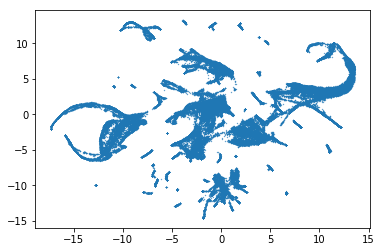

In [4]:
plt.scatter(df_umap["V1"], df_umap["V2"], s=0.1)

In [17]:
pca_100 = pd.read_csv("data/elegance/pca_100.csv")
pca_100 = pca_100.drop("Unnamed: 0", axis=1)
pca_100

PC1        PC2        PC3        PC4        PC5       PC6  \
0       5.471498   5.983200  17.838099 -10.069552  -1.880418 -0.062337   
1     -16.692444  -4.509412   3.041569  -0.381880   1.189764 -2.113760   
2      -4.311143 -13.657309  -0.922749  -6.972618  -8.756832 -0.558663   
3     -13.956876  -3.845195   7.988474  -3.456401  -0.295622 -1.420254   
4      -6.252220   7.764693  -5.225396   6.392751  -5.091022 -3.075600   
5     -17.632946   0.991935  -3.113550   2.184917   4.490168 -6.428372   
6      11.394535 -23.926631  -8.360531 -13.608597 -20.503656  1.924362   
7      -6.647239  12.193445  -9.547738   8.604067  -4.001397 -3.844089   
8     -16.164591  -6.259074   4.687609  -0.253915  -2.850316 -1.446326   
9      -6.465433   1.000095  14.109822  -7.044026  -1.933589 -0.469065   
10    -17.712986  -2.324103  -1.049066   1.735617   3.805188 -2.910084   
11     -0.495028  -0.824263  11.761150  -5.464282  -3.266937 -1.884166   
12    -11.053328   0.099581  -2.356976   0.285245   1.230064 -6.637738   
13    -18.882823  -0.626650   0.586113   1.642480   3.608090 -3.187317   
14    -18.098102  -5.680902   3.130048   1.594135   1.149070 -0.909130   
15    -11.291352   3.651366  -4.100613   1.556574   3.633979 -4.552473   
16    -17.057226  -0.063741  -0.997706   1.451071   3.325743 -4.754181   
17    -17.110492  -2.579917  -0.508071   0.513354   4.658184 -0.659174   
18    -13.565694  -2.325970   0.261070   0.178681  -1.441166 -3.809815   
19    -18.670419  -3.832633  -1.308813   1.599703   0.767037 -3.025438   
20      5.885018 -12.928188 -11.779329 -10.054477  -1.740980 -0.933734   
21    -16.712055  -0.996116  -1.218142   1.192205   4.729038 -3.253551   
22     -6.302714 -13.138037   0.151300  -6.484582  -6.775943  0.502525   
23    -17.429824  -4.470940   3.933544  -0.468173  -0.048618 -3.105203   
24     -9.217670   3.589317  -4.019378   2.339241   0.455676 -4.998982   
25     -0.567824   1.866477  10.369351  -5.859036   0.447374 -0.911793   
26    -12.706072   0.262954  -0.771939   0.192092   3.418857 -5.351755   
27     20.182086 -33.382752  26.098286  31.916512 -10.057145 -0.630132   
28    -16.548124  -0.175126  -1.852840   0.949705   4.894825 -4.354873   
29     -7.946825  -5.447737  -1.754938  -3.081147  -1.901625 -2.778189   
...          ...        ...        ...        ...        ...       ...   
89671  -7.556323   0.011116  -0.743008   0.611753   4.967562 -1.267611   
89672   1.635844  -2.695774  -3.761003  -0.223765  -0.260916 -0.370945   
89673 -10.234110   0.719498  -2.787711   2.263964   2.199649 -3.276140   
89674  -7.266698  -2.147218   1.632006   0.839301   3.501336 -0.269087   
89675   6.579404   3.370199  -4.215888   2.396996   4.220244  0.078432   
89676   9.568217   4.408228  -6.301599   1.780410   7.289360 -3.072617   
89677  12.996850   0.714345  -8.811061   1.286742  14.863291  1.863990   
89678  10.392439  -2.325488  -9.504860  -0.677036  10.047745  1.417561   
89679  -0.348953   3.203375  -2.240159   0.877254   0.580732 -2.519414   
89680   1.237277   0.079960  -0.208185   0.193121   2.696698  0.237631   
89681   0.453943  -1.941561  -1.759427   3.552562   0.196988 -2.609841   
89682   1.739665   1.466910  -4.069002   5.737952   0.703158 -3.542950   
89683   3.009649  -2.040843  -4.943422  -0.984029   2.066064  0.315645   
89684  11.449640  -0.478239  -7.883973   1.935488   9.622282  2.829647   
89685  -5.691206  -1.357373  -0.525023   0.799998   3.059511  0.730558   
89686   9.633182  -8.995856 -14.472337  -5.998127  -0.355798  0.673010   
89687  -0.904253  -1.357914   0.650747  -1.472886   1.762731  3.630610   
89688   8.324692   2.654181  -6.352284   3.073309   5.669442 -2.391742   
89689   4.552619   0.498793  -7.036761   1.887341   9.658591  2.074434   
89690   1.578563  -0.472717  -5.135561  -2.326884   0.811620 -3.582224   
89691   7.579151  -2.026903  -4.859366   5.529581   1.881961 -3.546189   
89692   1.789647  -3.894883  -6.354365  -3.073187  -2.348710 -1.685791   
89693  13.860992 

In [18]:
def covering_patches(lens_data, resolution=10, gain=0.5, equalize=True):
    cols = lens_data.columns
    xmin, xmax = lens_data[cols[0]].min(), lens_data[cols[0]].max()
    ymin, ymax = lens_data[cols[1]].min(), lens_data[cols[1]].max()
    patch_dict = {}

    if equalize:
        perc_step = 100.0 / resolution
        fence_posts_x = [np.percentile(lens_data[cols[0]], post) for post in np.arange(perc_step, 100, perc_step)]
        fence_posts_y = [np.percentile(lens_data[cols[1]], post) for post in np.arange(perc_step, 100, perc_step)]

        lower_bound_x = np.array([xmin] + fence_posts_x)
        upper_bound_x = np.array(fence_posts_x + [xmax])
        lower_bound_y = np.array([ymin] + fence_posts_y)
        upper_bound_y = np.array(fence_posts_y + [ymax])

        widths_x = upper_bound_x - lower_bound_x
        spill_over_x = gain * widths_x
        lower_bound_x -= spill_over_x
        upper_bound_x += spill_over_x
        widths_y = upper_bound_y - lower_bound_y
        spill_over_y = gain * widths_y
        lower_bound_y -= spill_over_y
        upper_bound_y += spill_over_y

        for i in range(resolution):
            for j in range(resolution):
                patch = list(lens_data[(lens_data[cols[0]] > lower_bound_x[i]) &
                                       (lens_data[cols[0]] < upper_bound_x[i]) &
                                       (lens_data[cols[1]] > lower_bound_y[j]) &
                                       (lens_data[cols[1]] < upper_bound_y[j])].index)
                key = ((round(lower_bound_x[i], 2), round(upper_bound_x[i], 2)),
                       (round(lower_bound_y[j], 2), round(upper_bound_y[j], 2)))
                patch_dict[key] = patch
        return patch_dict

    else:
        width_x = (xmax - xmin) / resolution
        width_y = (ymax - ymin) / resolution
        spill_over_x = gain * width_x
        spill_over_y = gain * width_y

        lower_bound_x = np.arange(xmin, xmax, width_x) - spill_over_x
        upper_bound_x = np.arange(xmin, xmax, width_x) + width_x + spill_over_x
        lower_bound_y = np.arange(ymin, ymax, width_y) - spill_over_y
        upper_bound_y = np.arange(ymin, ymax, width_y) + width_y + spill_over_y
        for i in range(resolution):
            #print(i)
            for j in range(resolution):
                patch = list(lens_data[(lens_data[cols[0]] > lower_bound_x[i]) &
                                       (lens_data[cols[0]] < upper_bound_x[i]) &
                                       (lens_data[cols[1]] > lower_bound_y[j]) &
                                       (lens_data[cols[1]] < upper_bound_y[j])].index)
                key = ((round(lower_bound_x[i], 2), round(upper_bound_x[i], 2)),
                       (round(lower_bound_y[j], 2), round(upper_bound_y[j], 2)))
                patch_dict[key] = patch
        return patch_dict
    

In [19]:
a = covering_patches(df_umap)

In [22]:
def davies_bouldin(dist_mu, sigma):
    DB = 0
    K = len(sigma)
    for i in range(K):
        D_i = 0
        for j in range(K):
            if j == i:
                continue
            R_ij = (sigma[i] + sigma[j]) / dist_mu[i, j]
            if R_ij > D_i:
                D_i = R_ij
        DB += D_i
    return DB / K


def optimal_clustering(sparse_mtrx, patch, method='kmeans', statistic='db', max_K=5):
    if len(patch) == 1:
        return [patch]

    if statistic == 'db':
        if method == 'kmeans':
            if len(patch) <= 5:
                K_max = 2
            else:
                K_max = min(len(patch) / 2, max_K)
            clustering = {}
            db_index = []
            X = pd.DataFrame(sparse_mtrx.ix[patch, :])
            for k in range(2, K_max + 1):
                kmeans = cluster.KMeans(n_clusters=k).fit(X)
                clustering[k] = pd.DataFrame(kmeans.predict(X), index=patch)
                dist_mu = squareform(pdist(kmeans.cluster_centers_))
                sigma = []
                for i in range(k):
                    points_in_cluster = clustering[k][clustering[k][0] == i].index
                    #print(points_in_cluster)
                    sigma.append(sqrt(X.ix[points_in_cluster, :].var(axis=0).sum()))
                db_index.append(davies_bouldin(dist_mu, np.array(sigma)))
            db_index = np.array(db_index)
            k_optimal = np.argmin(db_index) + 2
            return [list(clustering[k_optimal][clustering[k_optimal][0] == i].index) for i in range(k_optimal)]


In [23]:
key = a.keys()[0]
patch = a[key]
patch_clusterings = {}
patch_clusterings[key] = optimal_clustering(pca_100, patch)

In [26]:
patch_clusterings = {}
counter = 0
patches = covering_patches(df_umap)
for key, patch in patches.items():
    if len(patch) > 0:
        patch_clusterings[key] = optimal_clustering(pca_100, patch)
        counter += 1
        print counter
print 'total of {} patches required clustering'.format(counter)

all_clusters = []
for key in patch_clusterings:
    all_clusters += patch_clusterings[key]
print(len(all_clusters))
print(all_clusters)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
total of 100 patches required clustering
312
[[19, 177, 319, 440, 519, 673, 747, 875, 983, 1005, 1090, 1125, 1273, 1390, 1393, 1439, 1446, 1502, 1551, 1615, 1755, 1871, 2146, 2320, 2516, 2691, 2732, 2748, 2806, 2837, 2882, 3088, 3115, 3160, 3311, 3359, 3846, 3941, 4065, 4094, 4241, 4267, 4325, 4385, 4408, 4473, 4487, 4694, 4835, 4865, 4940, 4968, 4969, 5001, 5067, 5131, 5210, 5231, 5321, 5381, 5577, 5653, 5661, 5671, 5795, 5894, 5965, 6023, 6030, 6062, 6171, 6225, 6314, 6341, 6367, 6429, 6516, 6632, 6736, 6773, 6778, 6825, 6842, 6872, 6947, 6973, 7115, 7226, 7282, 7314, 7483, 7499, 7590, 7639, 7751, 7843, 7873, 7920, 7952, 8083, 8112, 8176, 8182, 8197, 8209, 8228, 8339, 8358, 8386, 8403, 8413, 8440,

In [28]:
import networkx as nx
all_clusters = []
for key in patch_clusterings:
    all_clusters += patch_clusterings[key]
num_nodes = len(all_clusters)
print 'this implies {} nodes in the mapper graph'.format(num_nodes)

A = np.zeros((num_nodes, num_nodes))
for i in range(num_nodes):
    print(i)
    for j in range(i):
        overlap = set(all_clusters[i]).intersection(set(all_clusters[j]))
        if len(overlap) > 0:
            A[i, j] = 1
            A[j, i] = 1

G = nx.from_numpy_matrix(A)
total = []
all_clusters_new = []
mapping = {}
cont = 0
for m in all_clusters:
    total += m
for n, m in enumerate(all_clusters):
    print(n)
    if len(m) == 1 and total.count(m) > 1:
        G.remove_node(n)
    else:
        all_clusters_new.append(m)
        mapping[n] = cont
        cont += 1
H = nx.relabel_nodes(G, mapping)
#return H, all_clusters_new, patches

this implies 312 nodes in the mapper graph
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266

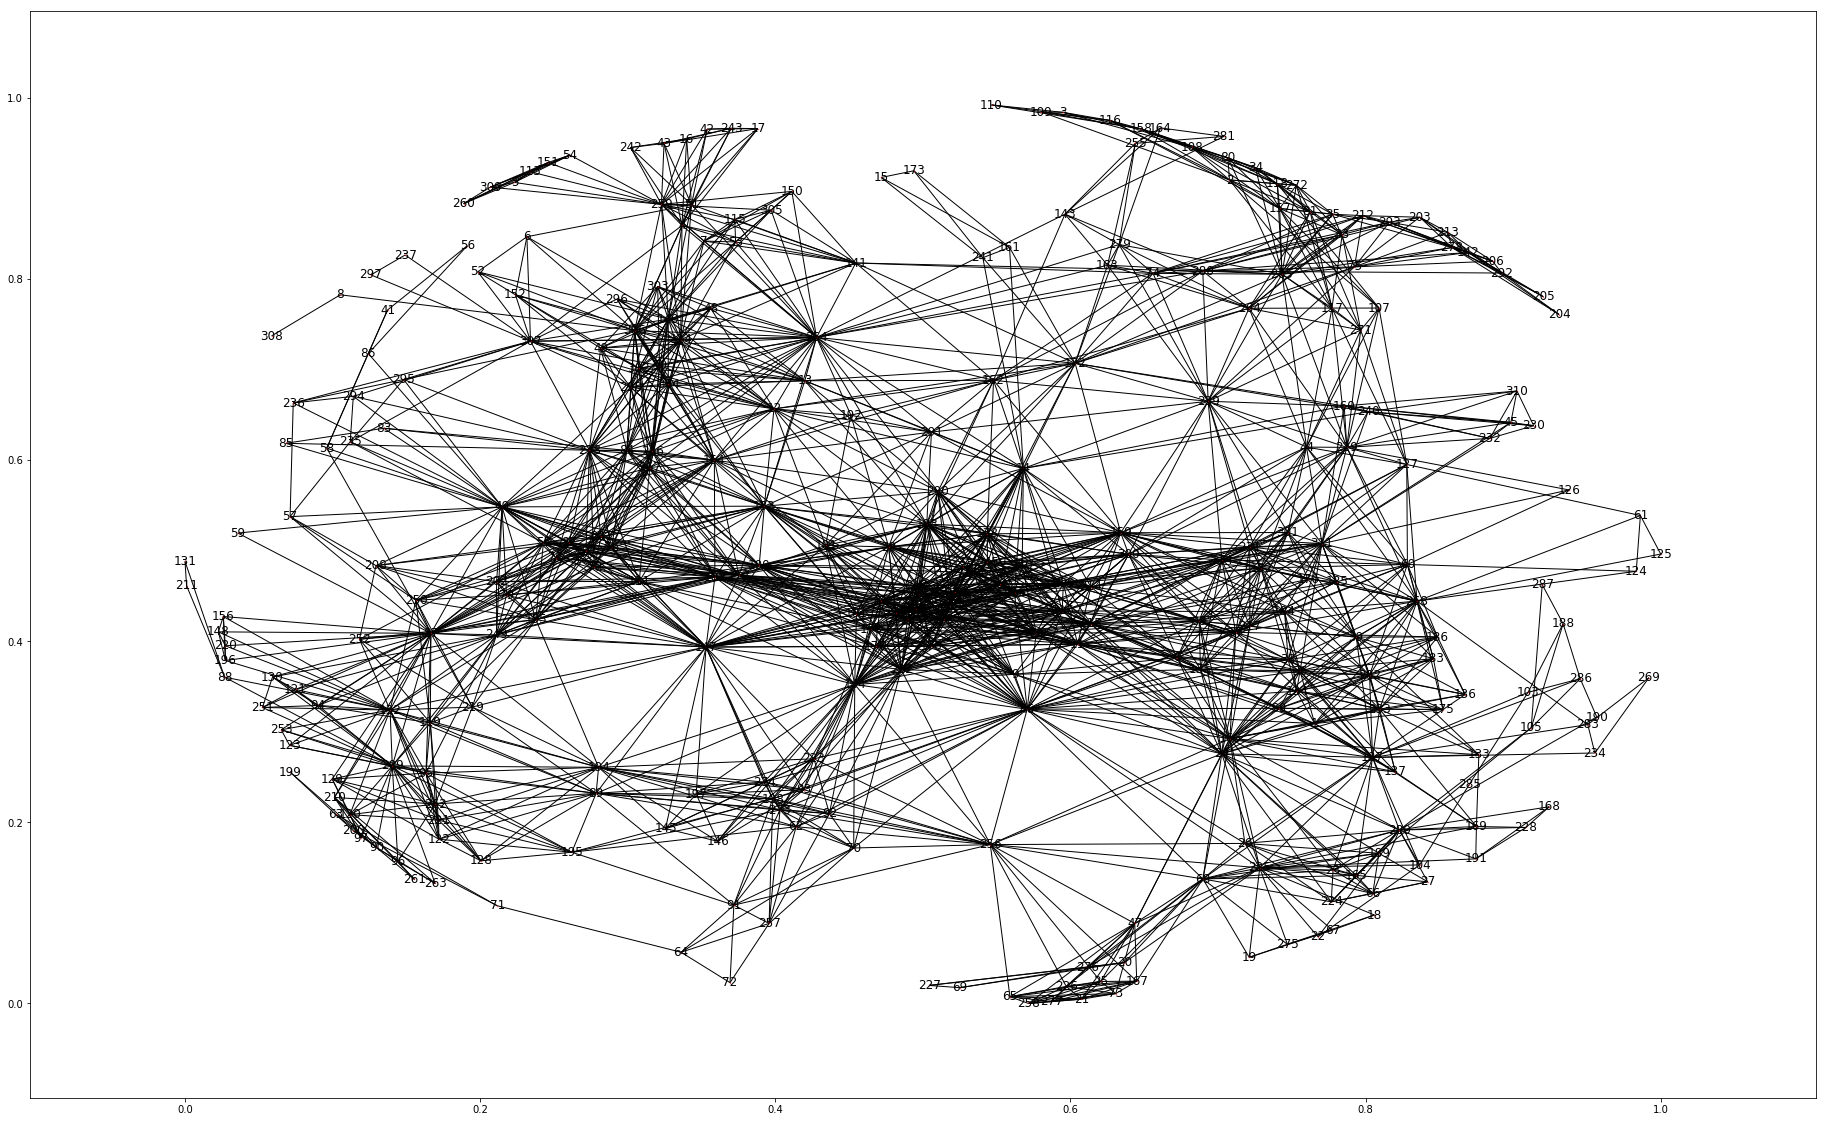

In [45]:
from networkx.drawing.nx_agraph import graphviz_layout
#import pygraphviz
#pos = nx.spring_layout(G)
#pos = graphviz_layout(G, prog="dot")
plt.figure(figsize=(32,20))
nx.draw_networkx(G,pos, node_size=0.1)



In [49]:
len(nx.to_numpy_matrix(H))

308

In [50]:
mapping

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57,
 58: 58,
 59: 59,
 60: 60,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 66,
 67: 67,
 68: 68,
 69: 69,
 70: 70,
 71: 71,
 72: 72,
 73: 73,
 74: 74,
 75: 75,
 76: 76,
 77: 77,
 78: 78,
 79: 79,
 80: 80,
 81: 81,
 82: 82,
 83: 83,
 84: 84,
 85: 85,
 86: 86,
 87: 87,
 88: 88,
 89: 89,
 90: 90,
 91: 91,
 92: 92,
 93: 93,
 94: 94,
 95: 95,
 96: 96,
 97: 97,
 98: 98,
 99: 99,
 100: 100,
 101: 101,
 102: 102,
 103: 103,
 104: 104,
 105: 105,
 107: 106,
 108: 107,
 109: 108,
 110: 109,
 111: 110,

In [92]:
cells = pd.read_csv("data/elegance/GSE126954_cell_annotation.csv")
cells

Unnamed: 0                      cell  n.umi   time.point  \
0      AAACCTGAGACAATAC-300.1.1  AAACCTGAGACAATAC-300.1.1   1630  300_minutes   
1      AAACCTGAGGGCTCTC-300.1.1  AAACCTGAGGGCTCTC-300.1.1   2319  300_minutes   
2      AAACCTGAGTGCGTGA-300.1.1  AAACCTGAGTGCGTGA-300.1.1   3719  300_minutes   
3      AAACCTGAGTTGAGTA-300.1.1  AAACCTGAGTTGAGTA-300.1.1   4251  300_minutes   
4      AAACCTGCAAGACGTG-300.1.1  AAACCTGCAAGACGTG-300.1.1   1003  300_minutes   
5      AAACCTGCAAGGTTCT-300.1.1  AAACCTGCAAGGTTCT-300.1.1   1319  300_minutes   
6      AAACCTGCACGTTGGC-300.1.1  AAACCTGCACGTTGGC-300.1.1   7503  300_minutes   
7      AAACCTGCATCACCCT-300.1.1  AAACCTGCATCACCCT-300.1.1   1400  300_minutes   
8      AAACCTGGTACATGTC-300.1.1  AAACCTGGTACATGTC-300.1.1   4100  300_minutes   
9      AAACCTGGTCTGGAGA-300.1.1  AAACCTGGTCTGGAGA-300.1.1   2648  300_minutes   
10     AAACCTGGTGTGAATA-300.1.1  AAACCTGGTGTGAATA-300.1.1   1458  300_minutes   
11     AAACCTGGTTATGCGT-300.1.1  AAACCTGGTTATGCGT-300.1.1   1463  300_minutes   
12     AAACCTGGTTTACTCT-300.1.1  AAACCTGGTTTACTCT-300.1.1   1291  300_minutes   
13     AAACCTGTCACCCTCA-300.1.1  AAACCTGTCACCCTCA-300.1.1   1926  300_minutes   
14     AAACCTGTCATCTGCC-300.1.1  AAACCTGTCATCTGCC-300.1.1   1669  300_minutes   
15     AAACCTGTCCAGATCA-300.1.1  AAACCTGTCCAGATCA-300.1.1   1333  300_minutes   
16     AAACCTGTCGGCCGAT-300.1.1  AAACCTGTCGGCCGAT-300.1.1   1633  300_minutes   
17     AAACGGGAGAGGTTAT-300.1.1  AAACGGGAGAGGTTAT-300.1.1   1894  300_minutes   
18     AAACGGGAGAGGTTGC-300.1.1  AAACGGGAGAGGTTGC-300.1.1   3072  300_minutes   
19     AAACGGGAGCGTTGCC-300.1.1  AAACGGGAGCGTTGCC-300.1.1   3613  300_minutes   
20     AAACGGGCACATGACT-300.1.1  AAACGGGCACATGACT-300.1.1   4365  300_minutes   
21     AAACGGGCAGGTTTCA-300.1.1  AAACGGGCAGGTTTCA-300.1.1   1692  300_minutes   
22     AAACGGGCAGTCGTGC-300.1.1  AAACGGGCAGTCGTGC-300.1.1   5866  300_minutes   
23     AAACGGGGTTGTGGCC-300.1.1  AAACGGGGTTGTGGCC-300.1.1   3268  300_minutes   
24     AAACGGGTCGGATGGA-300.1.1  AAACGGGTCGGATGGA-300.1.1   1139  300_minutes   
25     AAACGGGTCGTTACGA-300.1.1  AAACGGGTCGTTACGA-300.1.1   1362  300_minutes   
26     AAACGGGTCTATCCCG-300.1.1  AAACGGGTCTATCCCG-300.1.1   1112  300_minutes   
27     AAAGATGAGAGTCGGT-300.1.1  AAAGATGAGAGTCGGT-300.1.1   7800  300_minutes   
28     AAAGATGCAAGGGTCA-300.1.1  AAAGATGCAAGGGTCA-300.1.1   1468  300_minutes   
29     AAAGATGCAGACAGGT-300.1.1  AAAGATGCAGACAGGT-300.1.1   1469  300_minutes   
...                         ...                       ...    ...          ...   
89671      CGCGTTTAGCGTAGTG-b02      CGCGTTTAGCGTAGTG-b02    818        mixed   
89672      CGTAGCGAGGAGTAGA-b02      CGTAGCGAGGAGTAGA-b02    530        mixed   
89673      CGTTCTGGTGGTTTCA-b02      CGTTCTGGTGGTTTCA-b02   1491        mixed   
89674      CTTACCGAGGCCCGTT-b02      CTTACCGAGGCCCGTT-b02    907        mixed   
89675      CTTCTCTCATGACGGA-b02      CTTCTCTCATGACGGA-b02    624        mixed   
89676      CTTGGCTTCTGACCTC-b02      CTTGGCTTCTGACCTC-b02    557        mixed   
89677      GAACCTAAGCTCCTCT-b02      GAACCTAAGCTCCTCT-b02    670        mixed   
89678      GAACCTAGTGACTACT-b02      GAACCTAGTGACTACT-b02    933        mixed   
89679      GAATAAGAGCTAACTC-b02      GAATAAGAGCTAACTC-b02    515        mixed   
89680      GACGGCTTCACAATGC-b02      GACGGCTTCACAATGC-b02    583        mixed   
89681      GACTGCGCACTTAAGC-b02      GACTGCGCACTTAAGC-b02    761        mixed   
89682      GCAAACTCACCTATCC-b02      GCAAACTCACCTATCC-b02    642        mixed   
89683      GCACATAAGCGCTCCA-b02      GCACATAAGCGCTCCA-b02    644        mixed   
89684      GCTGCTTCATAGAAAC-b02      GCTGCTTCATAGAAAC-b02    566        mixed   
89685      GGCCGATCACAGAGGT-b02      GGCCGATCACAGAGGT-b02    572        mixed   
89686      GGGCACTTCTGCAAGT-b02      GGGCACTTCTGCAAGT-b02   1271        mixed   
89687      GTAACGTGTCACAAGG-b02      GTAACGTGTCACAAGG-b02    518        mixed   
89688      GTAACTGCACATGACT-b02      GTAACTGCACATGAC

In [95]:
cells.ix[[0,1,2], "raw.embryo.time"].sum()

890

In [119]:
import matplotlib.cm as cm

def color_mapping(time):
    if time < 150:
        return "navy"
    elif time < 210:
        return "royalblue"
    elif time < 270:
        return "skyblue"
    elif time < 330:
        return "seagreen"
    elif time < 390:
        return "limegreen"
    elif time < 450:
        return "y"
    elif time < 510:
        return "gold"
    elif time < 580:
        return "orange"
    else:
        return "red"

In [120]:
sizes = {}
times = {}
colors = {}
for idx, cluster in enumerate(all_clusters_new):
    sizes[idx] = len(cluster) 
    ave_time = cells.ix[cluster, "raw.embryo.time"].sum() / len(cluster)
    times[idx] = ave_time
    colors[idx] = color_mapping(ave_time)

sizes

{0: 654,
 1: 116,
 2: 4369,
 3: 1076,
 4: 638,
 5: 60,
 6: 239,
 7: 584,
 8: 139,
 9: 1256,
 10: 1424,
 11: 1000,
 12: 3578,
 13: 2239,
 14: 1883,
 15: 35,
 16: 249,
 17: 280,
 18: 85,
 19: 96,
 20: 69,
 21: 38,
 22: 11,
 23: 174,
 24: 1292,
 25: 148,
 26: 158,
 27: 89,
 28: 836,
 29: 371,
 30: 990,
 31: 825,
 32: 632,
 33: 2273,
 34: 1574,
 35: 658,
 36: 1850,
 37: 520,
 38: 1294,
 39: 896,
 40: 5154,
 41: 209,
 42: 122,
 43: 80,
 44: 3889,
 45: 423,
 46: 4456,
 47: 150,
 48: 495,
 49: 1126,
 50: 1592,
 51: 604,
 52: 167,
 53: 558,
 54: 60,
 55: 5391,
 56: 85,
 57: 346,
 58: 213,
 59: 99,
 60: 1783,
 61: 331,
 62: 2891,
 63: 584,
 64: 828,
 65: 144,
 66: 238,
 67: 110,
 68: 834,
 69: 68,
 70: 977,
 71: 420,
 72: 586,
 73: 38,
 74: 1852,
 75: 994,
 76: 365,
 77: 332,
 78: 420,
 79: 246,
 80: 2514,
 81: 3312,
 82: 1653,
 83: 107,
 84: 1071,
 85: 104,
 86: 229,
 87: 9060,
 88: 106,
 89: 5480,
 90: 319,
 91: 1163,
 92: 2127,
 93: 749,
 94: 373,
 95: 3472,
 96: 572,
 97: 696,
 98: 850,
 99

In [121]:
colors

{0: 'skyblue',
 1: 'limegreen',
 2: 'gold',
 3: 'red',
 4: 'gold',
 5: 'navy',
 6: 'red',
 7: 'navy',
 8: 'red',
 9: 'seagreen',
 10: 'skyblue',
 11: 'skyblue',
 12: 'skyblue',
 13: 'royalblue',
 14: 'skyblue',
 15: 'orange',
 16: 'orange',
 17: 'y',
 18: 'orange',
 19: 'y',
 20: 'red',
 21: 'red',
 22: 'red',
 23: 'gold',
 24: 'seagreen',
 25: 'red',
 26: 'orange',
 27: 'red',
 28: 'seagreen',
 29: 'seagreen',
 30: 'seagreen',
 31: 'seagreen',
 32: 'skyblue',
 33: 'limegreen',
 34: 'y',
 35: 'limegreen',
 36: 'seagreen',
 37: 'skyblue',
 38: 'seagreen',
 39: 'seagreen',
 40: 'y',
 41: 'red',
 42: 'limegreen',
 43: 'y',
 44: 'seagreen',
 45: 'y',
 46: 'seagreen',
 47: 'red',
 48: 'royalblue',
 49: 'royalblue',
 50: 'skyblue',
 51: 'gold',
 52: 'red',
 53: 'navy',
 54: 'navy',
 55: 'y',
 56: 'red',
 57: 'red',
 58: 'orange',
 59: 'red',
 60: 'skyblue',
 61: 'y',
 62: 'seagreen',
 63: 'orange',
 64: 'y',
 65: 'red',
 66: 'orange',
 67: 'orange',
 68: 'y',
 69: 'red',
 70: 'limegreen',
 7

In [129]:
sizes = size.values()
sizes = list(np.array(sizes))

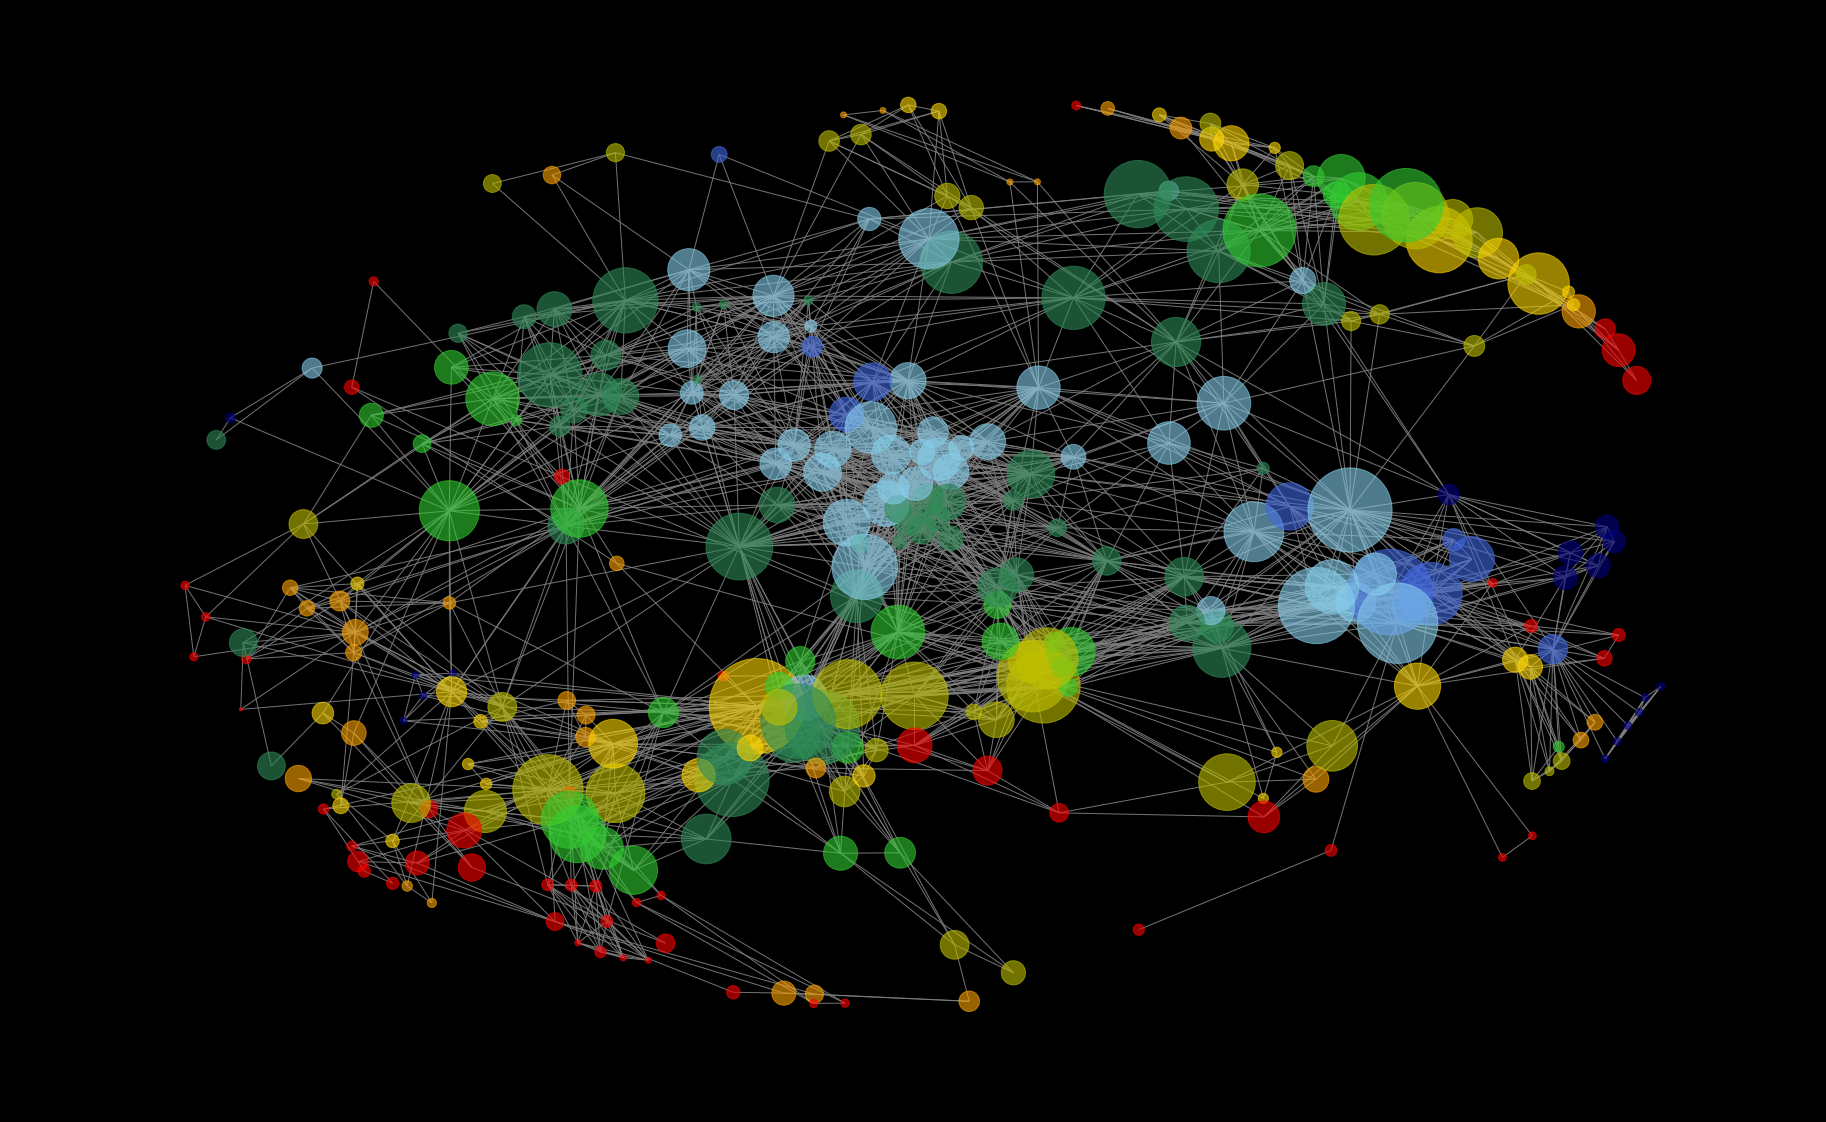

In [142]:
fig, ax = plt.subplots(figsize=(32,20))
#plt.figure(figsize=(32,20), facecolor="black")
#pos = nx.spring_layout(H)
nx.draw_networkx_nodes(pg, pos, node_size=sizes, alpha=0.6, node_color=colors.values())
nx.draw_networkx_edges(pg, pos, width=1, alpha=0.9, edge_color='gray')

ax.set_facecolor("black")
ax.axis("off")
fig.set_facecolor("black")
plt.show()
plt.savefig("pca_100_umap_raw_embryo_time_5.png")

In [145]:
from networkx.drawing.nx_agraph import graphviz_layout
listii = [len(aa.nodes()) for aa in list(networkx.connected_component_subgraphs(H))]
indexii = listii.index(numpy.max(listii))
gl = list(networkx.connected_component_subgraphs(H))[indexii]

posgl  = graphviz_layout(gl, 'sfdp', '-Goverlap=false -GK=0.1')
#pg = graphviz_layout(H, 'sfdp', '-Goverlap=false -GK=0.1')

pg = gl
pos = posgl

ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

In [ ]:
patch_clusterings = {}
counter = 0
#patches = covering_patches(lens_data, resolution=resolution, gain=gain, equalize=equalize)
for key, patch in a.items():
    if len(patch) > 0:
        patch_clusterings[key] = optimal_clustering(csr_mtrx, patch)
        counter += 1
        print counter

1
2
3
4


In [112]:
cells.ix[all_clusters_new[6], "raw.embryo.time"]

17194    630
19465    550
26373    550
34883    630
40393    620
40791    630
41022    630
41834    620
42197    550
42472    620
42904    640
43132    620
43833    630
44706    620
45196    630
45855    620
45903    620
46001    640
46598    630
46927    620
46991    630
47476    630
47994    620
48156    620
48194    630
48340    630
48599    620
48626    620
48698    630
48829    550
        ... 
78915    320
78917    320
79034    620
79068    800
79118    630
79342    700
79408    640
79523    640
79600    640
79661    630
79671    620
79718    620
79798    640
79839    640
79887    510
79934    630
80002    700
80024    640
80047    640
80278    630
80299    630
80310    630
80330    260
80583    550
80598    640
80659    630
80765    750
81032    620
81093    700
81232    630
Name: raw.embryo.time, dtype: int64

In [25]:
hoge = 1

In [ ]:
# 元データの疎行列と、preprocessしたUMAPのlensデータを準備できたら


In [ ]:
# 疎行列用


def covering_patches(lens_data, resolution=10, gain=0.5, equalize=True):
    cols = lens_data.columns
    xmin, xmax = lens_data[cols[0]].min(), lens_data[cols[0]].max()
    ymin, ymax = lens_data[cols[1]].min(), lens_data[cols[1]].max()
    patch_dict = {}

    if equalize:
        perc_step = 100.0 / resolution
        fence_posts_x = [np.percentile(lens_data[cols[0]], post) for post in np.arange(perc_step, 100, perc_step)]
        fence_posts_y = [np.percentile(lens_data[cols[1]], post) for post in np.arange(perc_step, 100, perc_step)]

        lower_bound_x = np.array([xmin] + fence_posts_x)
        upper_bound_x = np.array(fence_posts_x + [xmax])
        lower_bound_y = np.array([ymin] + fence_posts_y)
        upper_bound_y = np.array(fence_posts_y + [ymax])

        widths_x = upper_bound_x - lower_bound_x
        spill_over_x = gain * widths_x
        lower_bound_x -= spill_over_x
        upper_bound_x += spill_over_x
        widths_y = upper_bound_y - lower_bound_y
        spill_over_y = gain * widths_y
        lower_bound_y -= spill_over_y
        upper_bound_y += spill_over_y

        for i in range(resolution):
            for j in range(resolution):
                patch = list(lens_data[(lens_data[cols[0]] > lower_bound_x[i]) &
                                       (lens_data[cols[0]] < upper_bound_x[i]) &
                                       (lens_data[cols[1]] > lower_bound_y[j]) &
                                       (lens_data[cols[1]] < upper_bound_y[j])].index)
                key = ((round(lower_bound_x[i], 2), round(upper_bound_x[i], 2)),
                       (round(lower_bound_y[j], 2), round(upper_bound_y[j], 2)))
                patch_dict[key] = patch
        return patch_dict

    else:
        width_x = (xmax - xmin) / resolution
        width_y = (ymax - ymin) / resolution
        spill_over_x = gain * width_x
        spill_over_y = gain * width_y

        lower_bound_x = np.arange(xmin, xmax, width_x) - spill_over_x
        upper_bound_x = np.arange(xmin, xmax, width_x) + width_x + spill_over_x
        lower_bound_y = np.arange(ymin, ymax, width_y) - spill_over_y
        upper_bound_y = np.arange(ymin, ymax, width_y) + width_y + spill_over_y
        for i in range(resolution):
            for j in range(resolution):
                patch = list(lens_data[(lens_data[cols[0]] > lower_bound_x[i]) &
                                       (lens_data[cols[0]] < upper_bound_x[i]) &
                                       (lens_data[cols[1]] > lower_bound_y[j]) &
                                       (lens_data[cols[1]] < upper_bound_y[j])].index)
                key = ((round(lower_bound_x[i], 2), round(upper_bound_x[i], 2)),
                       (round(lower_bound_y[j], 2), round(upper_bound_y[j], 2)))
                patch_dict[key] = patch
        return patch_dict
    
    

def davies_bouldin(dist_mu, sigma):
    DB = 0
    K = len(sigma)
    for i in range(K):
        D_i = 0
        for j in range(K):
            if j == i:
                continue
            R_ij = (sigma[i] + sigma[j]) / dist_mu[i, j]
            if R_ij > D_i:
                D_i = R_ij
        DB += D_i
    return DB / K


def optimal_clustering(sparse_mtrx, patch, method='kmeans', statistic='gap', max_K=5):
    if len(patch) == 1:
        return [patch]

    if statistic == 'db':
        if method == 'kmeans':
            if len(patch) <= 5:
                K_max = 2
            else:
                K_max = min(len(patch) / 2, max_K)
            clustering = {}
            db_index = []
            X = pd.DataFrame(sparse_mtrx[patch, :].toarray())
            for k in range(2, K_max + 1):
                kmeans = cluster.KMeans(n_clusters=k).fit(X)
                clustering[k] = pd.DataFrame(kmeans.predict(X), index=patch)
                dist_mu = squareform(pdist(kmeans.cluster_centers_))
                sigma = []
                for i in range(k):
                    points_in_cluster = clustering[k][clustering[k][0] == i].index
                    #print(points_in_cluster)
                    sigma.append(sqrt(X.ix[points_in_cluster, :].var(axis=0).sum()))
                db_index.append(davies_bouldin(dist_mu, np.array(sigma)))
            db_index = np.array(db_index)
            k_optimal = np.argmin(db_index) + 2
            return [list(clustering[k_optimal][clustering[k_optimal][0] == i].index) for i in range(k_optimal)]

        elif method == 'agglomerative':
            if len(patch) <= 5:
                K_max = 2
            else:
                K_max = min(len(patch) / 2, max_K)
            clustering = {}
            db_index = []
            X = sparse_mtrx[patch, :].toarray()
            for k in range(2, K_max + 1):
                agglomerative = cluster.AgglomerativeClustering(n_clusters=k, linkage='average').fit(X)
                clustering[k] = pd.DataFrame(agglomerative.fit_predict(X), index=patch)
                tmp = [list(clustering[k][clustering[k][0] == i].index) for i in range(k)]
                centers = np.array([np.mean(X.ix[c, :], axis=0) for c in tmp])
                dist_mu = squareform(pdist(centers))
                sigma = []
                for i in range(k):
                    points_in_cluster = clustering[k][clustering[k][0] == i].index
                    sigma.append(sqrt(X.ix[points_in_cluster, :].var(axis=0).sum()))
                db_index.append(davies_bouldin(dist_mu, np.array(sigma)))
            db_index = np.array(db_index)
            k_optimal = np.argmin(db_index) + 2
            return [list(clustering[k_optimal][clustering[k_optimal][0] == i].index) for i in range(k_optimal)]

#     elif statistic == 'gap':
#         X = np.array(df.ix[patch, :])
#         if method == 'kmeans':
#             f = cluster.KMeans
#         gaps = gap(X, ks=range(1, min(max_K, len(patch))), method=f)
#         k_optimal = list(gaps).index(max(gaps))+1
#         clustering = pd.DataFrame(f(n_clusters=k_optimal).fit_predict(X), index=patch)
#         return [list(clustering[clustering[0] == i].index) for i in range(k_optimal)]

    else:
        raise 'error: only db and gat statistics are supported'
        
        
        
        
def mapper_graph(sparse_mtrx, lens_data=None, lens='pca', resolution=10, gain=0.5, equalize=True, clust='kmeans', stat='db',
                 max_K=5):
    """
    input: N x n_dim image of of raw data under lens function, as a dataframe
    output: (undirected graph, list of node contents, dictionary of patches)
    """
#     if lens_data is None:
#         lens_data = apply_lens(sparse_mtrx, lens=lens)

    patch_clusterings = {}
    counter = 0
    patches = covering_patches(lens_data, resolution=resolution, gain=gain, equalize=equalize)
    for key, patch in patches.items():
        if len(patch) > 0:
            patch_clusterings[key] = optimal_clustering(sparse_mtrx, patch, method=clust, statistic=stat, max_K=max_K)
            counter += 1
    print 'total of {} patches required clustering'.format(counter)

    all_clusters = []
    for key in patch_clusterings:
        all_clusters += patch_clusterings[key]
    num_nodes = len(all_clusters)
    print 'this implies {} nodes in the mapper graph'.format(num_nodes)

    A = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(i):
            overlap = set(all_clusters[i]).intersection(set(all_clusters[j]))
            if len(overlap) > 0:
                A[i, j] = 1
                A[j, i] = 1

    G = nx.from_numpy_matrix(A)
    total = []
    all_clusters_new = []
    mapping = {}
    cont = 0
    for m in all_clusters:
        total += m
    for n, m in enumerate(all_clusters):
        if len(m) == 1 and total.count(m) > 1:
            G.remove_node(n)
        else:
            all_clusters_new.append(m)
            mapping[n] = cont
            cont += 1
    H = nx.relabel_nodes(G, mapping)
    return H, all_clusters_new, patches




In [ ]:
G, all_clusters, patches = mapper_graph(csr_mtrx, lens_data=df_umap)

In [ ]:
hoge = pd.DataFrame(np.arange(9).reshape((3,3)))
hoge

In [29]:
hoge.ix[[1,2], :].var()

0  1  2
1  3  4  5
2  6  7  8

In [33]:
pd.DataFrame(csr_mtrx[[1,2], :].toarray())

0      1      2      3      4      5      6      7      8      9      \
0      0      5      0      0      7      3      5      8      3      5   
1      0     20      0      7     17      0      5     18      2      3   

   ...    20213  20214  20215  20216  20217  20218  20219  20220  20221  20222  
0  ...        0      0      0      0      0      0      0      1      0      0  
1  ...        0      0      0      0      0      0      0      0      0      0  

[2 rows x 20223 columns]